# The netCDF Interface
The Network Common Data Form, or netCDF, is an interface to a library of data access functions for storing and retrieving data in the form of arrays. An array is an n-dimensional (where n is 0, 1, 2, ...) rectangular structure containing items which all have the same data type (e.g., 8-bit character, 32-bit integer). A scalar (simple single value) is a 0-dimensional array.

Indexing and selecting data
Similarly to pandas objects, xarray objects support both integer and label based lookups along each dimension. However, xarray objects also have named dimensions, so you can optionally use dimension names instead of relying on the positional ordering of dimensions.


In [54]:
import xarray as xr
import numpy as np


In [55]:
# reading data files

ds = xr.open_dataset("E:\imd_data\RF25_ind2003_rfp25.nc")

In [56]:
ds

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [59]:
# Quick visualization of data

rf = ds['RAINFALL'][0,:,:]

#ds['RAINFALL'][0,:,:].plot()

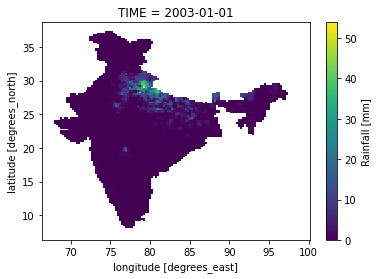

In [61]:
rf.plot()

In [62]:
# Reading multiple files

ds1 =xr.open_mfdataset("E:/imd_data/*.nc")


In [63]:
ds1

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 7671)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(366, 129, 135), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [64]:
# Extracting data for lat lon box

lat_bbox, lon_bbox = slice(10,40), slice(70,100)


In [66]:
ds2 = ds1.sel(LATITUDE=lat_bbox, LONGITUDE=lon_bbox)

In [68]:
# Selecting specific month data



ds2 = ds1.sel(TIME = ds1['TIME.month'].isin([6]))
ds3 = ds1.sel(TIME = ds1['TIME.month'].isin([7]))
ds4 = ds1.sel(TIME = ds1['TIME.month'].isin([8]))
ds5 = ds1.sel(TIME = ds1['TIME.month'].isin([9]))

In [70]:
clim =ds1.sel(TIME = ds1['TIME.month'].isin([6])).mean(dim='TIME')

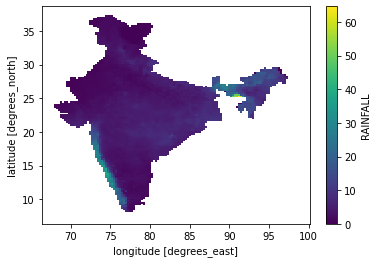

In [74]:
clim['RAINFALL'].plot()

In [75]:
# if you want to select data for each month 
# here we can apply for loop 

new_var = []
for i in range(12):
    new_var.append(ds1.sel(TIME = ds1['TIME.month'].isin([i+1])))
    
    

In [78]:
new_var[1]

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 594)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2000-02-01 2000-02-02 ... 2020-02-29
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(29, 129, 135), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [81]:
len(new_var)

first_month = new_var[0]
first_month

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 651)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-01-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 dask.array<chunksize=(31, 129, 135), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

# you can directly save this data into netcdf
just you have to write

In [39]:
first_month.to_netcdf("january_rainfall2000_2020.nc")

In [41]:
# Just explore whether we have done correctly

jan_data = xr.open_dataset("january_rainfall2000_2020.nc")
jan_data

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 651)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-01-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

Reading multiple files using for loop

In [3]:
import os
import glob

path = "E:/imd_data/"   

In [80]:
# Climatology calculation
#rf = [[]]*21

for i, filename in enumerate(sorted(glob.glob(os.path.join(path, '*.nc')))):
    print(i)
    print(filename)
    file = xr.open_dataset(filename)
   # rf[i]= file['RAINFALL']  

0
E:/imd_data\RF25_ind2000_rfp25.nc
1
E:/imd_data\RF25_ind2001_rfp25.nc
2
E:/imd_data\RF25_ind2002_rfp25.nc
3
E:/imd_data\RF25_ind2003_rfp25.nc
4
E:/imd_data\RF25_ind2004_rfp25.nc
5
E:/imd_data\RF25_ind2005_rfp25.nc
6
E:/imd_data\RF25_ind2006_rfp25.nc
7
E:/imd_data\RF25_ind2007_rfp25.nc
8
E:/imd_data\RF25_ind2008_rfp25.nc
9
E:/imd_data\RF25_ind2009_rfp25.nc
10
E:/imd_data\RF25_ind2010_rfp25.nc
11
E:/imd_data\RF25_ind2011_rfp25.nc
12
E:/imd_data\RF25_ind2012_rfp25.nc
13
E:/imd_data\RF25_ind2013_rfp25.nc
14
E:/imd_data\RF25_ind2014_rfp25.nc
15
E:/imd_data\RF25_ind2015_rfp25.nc
16
E:/imd_data\RF25_ind2016_rfp25.nc
17
E:/imd_data\RF25_ind2017_rfp25.nc
18
E:/imd_data\RF25_ind2018_rfp25.nc
19
E:/imd_data\RF25_ind2019_rfp25.nc
20
E:/imd_data\RF25_ind2020_rfp25.nc


In [6]:
file

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 366)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [5]:

import netCDF4
longitude = file['LONGITUDE'].values
latitude = file['LATITUDE'].values
rainfall = file['RAINFALL'][0:4,:,:].values
TIME = file['TIME'][0:4]

In [6]:
TIME

<xarray.DataArray 'TIME' (TIME: 4)>
array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04
Attributes:
    axis:           T
    time_origin:    31-DEC-1900
    standard_name:  time

In [7]:
# Write netCDF file using netCDF library


In [82]:
from datetime import datetime
from datetime import timedelta

time_data = [datetime(2020, 1, 1) + timedelta(days=i) for i in range(4)]



In [83]:
time_data

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0)]

In [87]:
longitude.shape

(129,)

In [90]:


############## Creating netCDF4 file ############  
ncfile =netCDF4.Dataset("rainfall_first_4day_2.nc",mode='w',format='NETCDF4_CLASSIC')
lat_dim = ncfile.createDimension('lat',135)
lon_dim = ncfile.createDimension('lon',129)
time_dim= ncfile.createDimension('time',4)

In [9]:
TIME

<xarray.DataArray 'TIME' (TIME: 4)>
array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04
Attributes:
    axis:           T
    time_origin:    31-DEC-1900
    standard_name:  time

In [91]:
time_data

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0)]

In [92]:


ncfile.title ='rainfall during first 4 day of 2020'
    # Creating a Variable

lat =ncfile.createVariable('lat', np.float32,('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'

lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'

time = ncfile.createVariable('time',np.float32 , ('time',))
time.standard_name ='time'
time.long_name = 'time'
time.calendar = 'standard'
time.units = 'days since 1900-12-01'

time[:] = netCDF4.date2num(time_data, units='days since 1900-12-01', calendar='standard')
#time[:] = time_data

prcp = ncfile.createVariable('prcp',np.float64,('time','lon','lat'))
prcp.units = 'mm/day'
nlats = len(lat_dim); nlons = len(lon_dim) ; ntimes =4

lon[:] = longitude
lat[:] = latitude
prcp[:,:,:] =rainfall

ncfile.close()
print('ncfile created successfully')
print('Dataset is closed!')

ncfile created successfully
Dataset is closed!


In [93]:
## Just read the created variable
new_nc = xr.open_dataset("rainfall_first_4day_2.nc",decode_times=True)

In [94]:
new_nc

<xarray.Dataset>
Dimensions:  (lat: 135, lon: 129, time: 4)
Coordinates:
  * lat      (lat) float32 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lon      (lon) float32 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 2020-01-03 2020-01-04
Data variables:
    prcp     (time, lon, lat) float64 ...
Attributes:
    title:    rainfall during first 4 day of 2020

In [39]:
from datetime import datetime
from datetime import timedelta

In [24]:
dt.strftime('%Y-%m-%d')

'2010-02-25'

In [46]:
time_data

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0)]

In [17]:
import os
import glob

path = "E:/imd_data/"   

for i, filename in enumerate(sorted(glob.glob(os.path.join(path, '*.nc')))):
    print(filename)
    file = xr.open_dataset(filename)
    
    

E:/imd_data\RF25_ind2000_rfp25.nc
E:/imd_data\RF25_ind2001_rfp25.nc
E:/imd_data\RF25_ind2002_rfp25.nc
E:/imd_data\RF25_ind2003_rfp25.nc
E:/imd_data\RF25_ind2004_rfp25.nc
E:/imd_data\RF25_ind2005_rfp25.nc
E:/imd_data\RF25_ind2006_rfp25.nc
E:/imd_data\RF25_ind2007_rfp25.nc
E:/imd_data\RF25_ind2008_rfp25.nc
E:/imd_data\RF25_ind2009_rfp25.nc
E:/imd_data\RF25_ind2010_rfp25.nc
E:/imd_data\RF25_ind2011_rfp25.nc
E:/imd_data\RF25_ind2012_rfp25.nc
E:/imd_data\RF25_ind2013_rfp25.nc
E:/imd_data\RF25_ind2014_rfp25.nc
E:/imd_data\RF25_ind2015_rfp25.nc
E:/imd_data\RF25_ind2016_rfp25.nc
E:/imd_data\RF25_ind2017_rfp25.nc
E:/imd_data\RF25_ind2018_rfp25.nc
E:/imd_data\RF25_ind2019_rfp25.nc
E:/imd_data\RF25_ind2020_rfp25.nc


In [18]:
# Selcting JJAS data only



<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 366)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Generate random temperature data for a hypothetical time series
np.random.seed(42)  # for reproducibility
n_points = 100
time_series = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
temperature_data = np.random.normal(loc=20, scale=5, size=n_points)




In [99]:
temperature_data.shape

(100,)

In [ ]:


# Create a DataFrame to store the data
data = pd.DataFrame({'Date': time_series, 'Temperature': temperature_data})

# Perform linear regression to find the trend
slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(data)), data['Temperature'])


In [101]:

# Create a trend line using the slope and intercept
trend_line = slope * np.arange(len(data)) + intercept

Slope (Trend): 0.0070 °C per day
R-squared (Goodness of fit): 0.0020


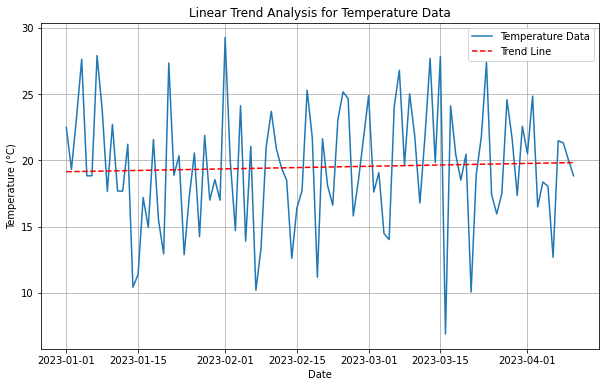

In [103]:

# Plot the original data and trend line
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Temperature'], label='Temperature Data')
plt.plot(data['Date'], trend_line, label='Trend Line', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Linear Trend Analysis for Temperature Data')
plt.legend()
plt.grid(True)

# Display the results
print(f"Slope (Trend): {slope:.4f} °C per day")
print(f"R-squared (Goodness of fit): {r_value**2:.4f}")

# Show the plot
plt.show()

In [20]:
import numpy as np

# Generate synthetic weather data (temperature in Celsius)
np.random.seed(0)  # Set seed for reproducibility
temperature_data = np.random.normal(25, 5, 100)  # Mean: 25°C, Standard Deviation: 5°C

# Basic statistical analysis
mean_temperature = np.mean(temperature_data)
median_temperature = np.median(temperature_data)
std_deviation_temperature = np.std(temperature_data)
min_temperature = np.min(temperature_data)
max_temperature = np.max(temperature_data)

# Print the results
print("Mean Temperature:", mean_temperature)
print("Median Temperature:", median_temperature)
print("Standard Deviation Temperature:", std_deviation_temperature)
print("Minimum Temperature:", min_temperature)
print("Maximum Temperature:", max_temperature)


Mean Temperature: 25.29904007767242
Median Temperature: 25.47048059718999
Standard Deviation Temperature: 5.039411223582898
Minimum Temperature: 12.235050920829607
Maximum Temperature: 36.34877311993804


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Generate synthetic date and temperature data
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
temperature_data = np.random.normal(25, 5, 365)
data = pd.DataFrame({'Date': dates, 'Temperature': temperature_data})
data.head(5)
time = data['Date']
temperature = data['Temperature']



In [49]:

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Temperature': temperature_data})


In [50]:
data

,Date,Temperature
0,2023-01-01,33.820262
1,2023-01-02,27.000786
2,2023-01-03,29.893690
3,2023-01-04,36.204466
4,2023-01-05,34.337790
...,...,...
360,2023-12-27,28.492286
361,2023-12-28,25.018854
362,2023-12-29,29.659242
363,2023-12-30,26.699825


In [ ]:

# Plot the time series
plt.figure(figsize=(10, 6), dpi =600)
plt.plot(data['Date'], data['Temperature'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform linear trend analysis
slope, intercept, r_value, p_value, std_err = linregress(range(len(data)), data['Temperature'])

# Print trend analysis results
print("Linear Trend Analysis:")
print("Slope (Temperature Increase per Day):", slope)
print("Intercept:", intercept)
print("R-squared Value:", r_value ** 2)
print("P-value:", p_value)

# Task 1

1. Create a random time series data for rainfall (365 days) and perform the linear regression 


 2. Create a netcdf-file for the 5-days time period from the above rainfall data using both methods.
 
 (I will share file)